In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [9]:
df = pd.read_csv('pivot_table_groupedby_adsh_with_finratios_and_no_nullvals_or_inf.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,adsh,fraud,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,0,0,0000002178-18-000009,0.0,1.939190e+08,3.910830e+08,5.484600e+07,2.057540e+08,3.608060e+08,8.634819e+09,...,0.458104,3.487102e+09,0.287669,62.510228,5.839044,0.015997,2.438422e+09,0.000000,0.303202,1.407573
1,1,1,0000002488-18-000042,0.0,3.670000e+08,4.719000e+09,-6.800000e+07,7.206000e+09,2.143000e+09,2.505300e+10,...,2.080050,1.209000e+10,0.325499,101.207084,3.606467,0.009881,6.242400e+10,0.179931,0.235365,0.194765
2,2,2,0000002969-18-000014,0.0,2.337100e+09,1.333080e+10,1.091700e+09,4.203800e+09,2.294970e+10,4.373600e+09,...,0.323475,1.983300e+09,0.311992,2.719995,134.191430,0.367648,1.589743e+11,0.035536,0.285110,0.005608
3,3,3,0000003499-18-000006,0.0,1.797337e+09,2.928676e+09,3.604470e+08,2.394690e+09,8.263830e+09,8.957640e+08,...,1.036936,6.701600e+08,0.427965,0.871247,418.939875,1.147780,1.454291e+10,0.000000,0.579604,0.021296
4,4,4,0000003545-18-000021,0.0,3.092700e+07,4.077000e+06,-2.657900e+07,2.743400e+07,7.406000e+06,3.747720e+08,...,1.083978,-3.059790e+08,-4.447822,2.224367,164.091623,0.449566,1.878445e+09,0.002391,0.009501,-0.148740


### Best pipeline per TPOT

In [ ]:
Best pipeline: GradientBoostingClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=11, min_samples_split=3, n_estimators=100), learning_rate=0.01, max_depth=10, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=6, n_estimators=100, subsample=0.7500000000000001)
TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=20,
        random_state=42, scoring=None, subsample=1.0, use_dask=False,
        verbosity=2, warm_start=False)

# Gradient Boosting

In [85]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import model_selection

In [10]:
target = df.fraud
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','adsh'])
df.head()

,fraud,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,0.0,1.939190e+08,3.910830e+08,5.484600e+07,2.057540e+08,3.608060e+08,8.634819e+09,0.000000e+00,1.024242e+09,7.475000e+06,...,0.458104,3.487102e+09,0.287669,62.510228,5.839044,0.015997,2.438422e+09,0.000000,0.303202,1.407573
1,0.0,3.670000e+08,4.719000e+09,-6.800000e+07,7.206000e+09,2.143000e+09,2.505300e+10,1.123200e+10,3.914400e+10,2.399000e+09,...,2.080050,1.209000e+10,0.325499,101.207084,3.606467,0.009881,6.242400e+10,0.179931,0.235365,0.194765
2,0.0,2.337100e+09,1.333080e+10,1.091700e+09,4.203800e+09,2.294970e+10,4.373600e+09,5.649300e+09,8.011260e+10,-5.577000e+08,...,0.323475,1.983300e+09,0.311992,2.719995,134.191430,0.367648,1.589743e+11,0.035536,0.285110,0.005608
3,0.0,1.797337e+09,2.928676e+09,3.604470e+08,2.394690e+09,8.263830e+09,8.957640e+08,0.000000e+00,3.823019e+09,8.264650e+08,...,1.036936,6.701600e+08,0.427965,0.871247,418.939875,1.147780,1.454291e+10,0.000000,0.579604,0.021296
4,0.0,3.092700e+07,4.077000e+06,-2.657900e+07,2.743400e+07,7.406000e+06,3.747720e+08,4.492000e+06,1.066886e+09,3.967600e+07,...,1.083978,-3.059790e+08,-4.447822,2.224367,164.091623,0.449566,1.878445e+09,0.002391,0.009501,-0.148740


In [27]:
df.describe(include = 'all')

,fraud,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
count,6032.000000,6.032000e+03,6.032000e+03,6.032000e+03,6.032000e+03,6.032000e+03,6.032000e+03,6.032000e+03,6.032000e+03,6.032000e+03,...,6.032000e+03,6.032000e+03,6032.000000,6032.000000,6.032000e+03,6.032000e+03,6.032000e+03,6032.000000,6032.000000,6032.000000
mean,0.020060,2.432070e+10,5.070703e+09,1.415350e+09,4.503691e+09,3.947127e+09,1.967368e+10,6.689992e+09,7.639623e+10,1.216242e+10,...,1.335812e+06,2.732106e+07,-466.148803,58.111602,4.502273e+05,1.233499e+03,1.299696e+11,0.089332,0.177072,-2.047647
std,0.140216,4.587488e+11,1.551257e+11,7.361133e+09,3.441292e+10,2.320210e+10,1.300799e+11,3.887676e+10,8.900714e+11,1.906075e+11,...,1.037472e+08,1.395846e+11,15352.469676,3427.723798,1.718367e+07,4.707855e+04,1.280068e+12,0.388295,0.262699,109.249942
min,0.000000,-3.329931e+09,-1.043187e+11,-5.119800e+10,-1.210100e+10,-1.976000e+10,-3.260400e+10,-2.758800e+07,-2.166573e+10,-1.226528e+09,...,-1.146225e+04,-3.690727e+12,-723794.281250,-54992.400000,-4.322525e+08,-1.184254e+06,-2.157924e+10,-0.320403,-11.707582,-7322.854297
25%,0.000000,1.336965e+06,5.352600e+04,-5.047515e+05,7.126077e+06,1.165991e+06,4.954603e+07,0.000000e+00,1.731475e+08,3.037750e+06,...,1.491006e-01,-2.004567e+08,-0.823082,0.001434,3.914028e+00,1.072337e-02,2.965063e+08,0.000000,0.034176,-0.109466
50%,0.000000,1.089030e+08,5.772550e+07,2.323700e+07,8.664400e+07,6.173050e+07,7.850689e+08,5.620771e+07,2.231112e+09,1.345810e+08,...,4.702265e-01,-9.299250e+04,0.000000,4.906988,2.860446e+01,7.836838e-02,4.372873e+09,0.016155,0.158369,-0.008422
75%,0.000000,1.376592e+09,5.613795e+08,4.456930e+08,9.366145e+08,1.010700e+09,5.112679e+09,1.325638e+09,1.313389e+10,1.185295e+09,...,8.910162e-01,1.150520e+09,0.446897,15.105609,1.008477e+02,2.762950e-01,3.101298e+10,0.118113,0.271029,0.127399
max,1.000000,2.777212e+13,1.151094e+13,1.908320e+11,1.346824e+12,8.760263e+11,4.552907e+12,9.600848e+11,4.029902e+13,8.497016e+12,...,8.057623e+09,6.665624e+12,142975.750000,258465.000000,9.750081e+08,2.671255e+06,4.602964e+13,28.442773,5.331022,963.584906


In [30]:
df = df.astype(float)
df.isnull().sum()

fraud                  0
AccountsReceivable     0
Cash                   0
CashFlowfromOps        0
CurrentLiabilities     0
Depreciation           0
Expenses               0
IntangibleAssets       0
OtherCurrentAssets     0
OtherIncome            0
OtherLiabilities       0
PPE                    0
Sales                  0
ShareholdersEquity     0
sum_of_first_digits    0
total_deviation        0
TotalCurrentAssets     0
CurrentRatio           0
TotalLiabilities       0
DebtToEquityRatio      0
NetIncome              0
ProfitMargin           0
ReceivableTurnover     0
CollectionRatio        0
DSRI                   0
TotalAssets            0
AQI                    0
DEPI                   0
TATA                   0
dtype: int64

In [33]:
df = df.drop(columns = 'fraud')
df.head()

,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,OtherLiabilities,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,1.939190e+08,3.910830e+08,5.484600e+07,2.057540e+08,3.608060e+08,8.634819e+09,0.000000e+00,1.024242e+09,7.475000e+06,4.620100e+08,...,0.458104,3.487102e+09,0.287669,62.510228,5.839044,0.015997,2.438422e+09,0.000000,0.303202,1.407573
1,3.670000e+08,4.719000e+09,-6.800000e+07,7.206000e+09,2.143000e+09,2.505300e+10,1.123200e+10,3.914400e+10,2.399000e+09,1.280200e+10,...,2.080050,1.209000e+10,0.325499,101.207084,3.606467,0.009881,6.242400e+10,0.179931,0.235365,0.194765
2,2.337100e+09,1.333080e+10,1.091700e+09,4.203800e+09,2.294970e+10,4.373600e+09,5.649300e+09,8.011260e+10,-5.577000e+08,3.811890e+10,...,0.323475,1.983300e+09,0.311992,2.719995,134.191430,0.367648,1.589743e+11,0.035536,0.285110,0.005608
3,1.797337e+09,2.928676e+09,3.604470e+08,2.394690e+09,8.263830e+09,8.957640e+08,0.000000e+00,3.823019e+09,8.264650e+08,4.275348e+09,...,1.036936,6.701600e+08,0.427965,0.871247,418.939875,1.147780,1.454291e+10,0.000000,0.579604,0.021296
4,3.092700e+07,4.077000e+06,-2.657900e+07,2.743400e+07,7.406000e+06,3.747720e+08,4.492000e+06,1.066886e+09,3.967600e+07,2.027521e+09,...,1.083978,-3.059790e+08,-4.447822,2.224367,164.091623,0.449566,1.878445e+09,0.002391,0.009501,-0.148740


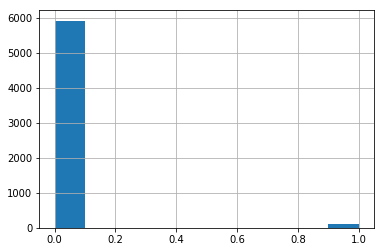

In [31]:
target.hist()

In [34]:
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# scaled_df.head()

,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,OtherLiabilities,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,-0.052597,-0.030169,-0.184838,-0.124903,-0.154582,-0.084869,-0.172096,-0.084688,-0.063775,-0.088026,...,-0.012877,0.024788,0.030384,0.001283,-0.026203,-0.026203,-0.099637,-0.230081,0.480172,0.031629
1,-0.052220,-0.002267,-0.201528,0.078532,-0.077763,0.041357,0.116841,-0.041857,-0.051227,-0.068805,...,-0.012877,0.086426,0.030387,0.012574,-0.026203,-0.026203,-0.052772,0.233345,0.221919,0.020527
2,-0.047925,0.053252,-0.043971,-0.008715,0.819070,-0.117630,-0.026771,0.004176,-0.066740,-0.029371,...,-0.012877,0.014014,0.030386,-0.016161,-0.026195,-0.026195,0.022661,-0.138555,0.411295,0.018796
3,-0.049101,-0.013809,-0.143319,-0.061290,0.186063,-0.144369,-0.172096,-0.081543,-0.059478,-0.082087,...,-0.012877,0.004606,0.030394,-0.016701,-0.026179,-0.026179,-0.090180,-0.230081,1.532420,0.018939
4,-0.052952,-0.032664,-0.195900,-0.130086,-0.169814,-0.148374,-0.171981,-0.084640,-0.063606,-0.085588,...,-0.012877,-0.002388,0.030076,-0.016306,-0.026194,-0.026194,-0.100074,-0.223922,-0.637933,0.017383


In [77]:
df = df.values
target = target.values

In [94]:
target

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df,target)

In [93]:
ext_clf = ExtraTreesClassifier(bootstrap=False, criterion='entropy', 
                                                          max_features=0.7000000000000001, min_samples_leaf=11, 
                                                          min_samples_split=3, n_estimators=100)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features=0.7000000000000001,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=11,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [95]:
gbt_clf = GradientBoostingClassifier(ext_clf,
                                     learning_rate=0.01, max_depth=10, max_features=0.35000000000000003, 
                                     min_samples_leaf=10, min_samples_split=6, n_estimators=100, 
                                     subsample=0.7500000000000001)

In [97]:
gbt_clf.fit(X_train,y_train)

TypeError: unsupported format string passed to ExtraTreesClassifier.__format__

In [89]:
results = model_selection.cross_val_score(model, df, target)
results

array([0.97962227, 0.9800995 , 0.9800995 ])

In [92]:
extc_clf_train_preds = model.predict(X_train)
extc_clf_test_preds = model.predict(X_test)
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
# display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, extc_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
# display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, extc_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics

Model: Gradient Boosted Trees
Accuracy: 0.9796640141467727
F1-Score: 0.0

Testing Metrics

Model: Gradient Boosted Trees
Accuracy: 0.9807692307692307
F1-Score: 0.0


In [79]:
# adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier(ExtraTreesClassifier(bootstrap=False, criterion='entropy', 
                                                          max_features=0.7000000000000001, min_samples_leaf=11, 
                                                          min_samples_split=3, n_estimators=100),
                                     learning_rate=0.01, max_depth=10, max_features=0.35000000000000003, 
                                     min_samples_leaf=10, min_samples_split=6, n_estimators=100, 
                                     subsample=0.7500000000000001)
gbt_clf.fit(X_train,y_train)

# 

TypeError: unsupported format string passed to ExtraTreesClassifier.__format__

In [43]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [45]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
# display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
# display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics

Model: Gradient Boosted Trees
Accuracy: 0.9885057471264368
F1-Score: 0.6231884057971014

Testing Metrics

Model: Gradient Boosted Trees
Accuracy: 0.9840848806366048
F1-Score: 0.14285714285714288


In [ ]:
Best pipeline: GradientBoostingClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7000000000000001, min_samples_leaf=11, min_samples_split=3, n_estimators=100), learning_rate=0.01, max_depth=10, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=6, n_estimators=100, subsample=0.7500000000000001)
TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=5,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=20,
        random_state=42, scoring=None, subsample=1.0, use_dask=False,
        verbosity=2, warm_start=False)

In [ ]:
pipeline_optimizer2 = TPOTClassifier(generations=10, population_size=50, cv=5,random_state=42, verbosity=2)
pipeline_optimizer2.fit(X_train.as_matrix(), y_train.as_matrix())

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(LogisticRegression(input_matrix, C=0.5, dual=True, penalty=l2), learning_rate=0.5, max_depth=4, max_features=0.55, min_samples_leaf=18, min_samples_split=11, n_estimators=100, subsample=0.8500000000000001), bootstrap=False, criterion=gini, max_features=0.3, min_samples_leaf=16, min_samples_split=16, n_estimators=100)
TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=50,
        random_state=42, scoring=None, subsample=1.0, use_dask=False,
        verbosity=2, warm_start=False)